<h1 style="color: yellow">Session 4 Hands on Lab</h1>

In [6]:
import cv2, matplotlib.pyplot as plt

## Edge Detection
=> Membantu komputer untuk memahami struktur dan bentuk dalam gambar 

In [10]:
img = cv2.imread('cat.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('gray', gray)
cv2.waitKey()
cv2.destroyAllWindows()

### Sobel
Berbasis gradien, dan menncari area gambar yang memiliki intensitas paling besar

Sobel x: horizontal

Sobel y: vertikal

In [ ]:
# Sobel(img, cv2.CV_64F, kernel size)
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, 3)
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, 3)

# cara kerja bakalan dapatin kernelnya x derivative y 
# akan terbentuk 2, sobel x dan sobel y

cv2.imshow('gray', sobel_y)
cv2.waitKey()
cv2.destroyAllWindows()

### Laplacian
Tidak melihat lewat arah, berdasarkan contur

In [13]:
laplacian = cv2.Laplacian(gray, cv2.CV_64F)

### Canny
1. **_Noise Reduction_** => Gaussian Blur
2. **_Gradient Calculation_** => Hitung gradient intensitas pakai operator sobel
3. **_Non Maximum Suppression_** => Jika ada gradient lokal maka akan dihapus|
4. **_Double Threshold_** => Pixel dengan magnitude rendah akan dibuang, sedangkan yang tinggi akan diterima dengan edge, pixel yang ada di rentang rendah dan tinggi akan dipertahankan jika terhubung dengan edge yang kuat
5. **_Edge Tracking_** => Menghubungkan edge kuat dengan edge lemah yang berdekatan 

In [15]:
# param1 => source image
# param2 => batas rendah dari edge
# param3 => batas tinggi dari edge

canny = cv2.Canny(gray, 100, 200)

### Result

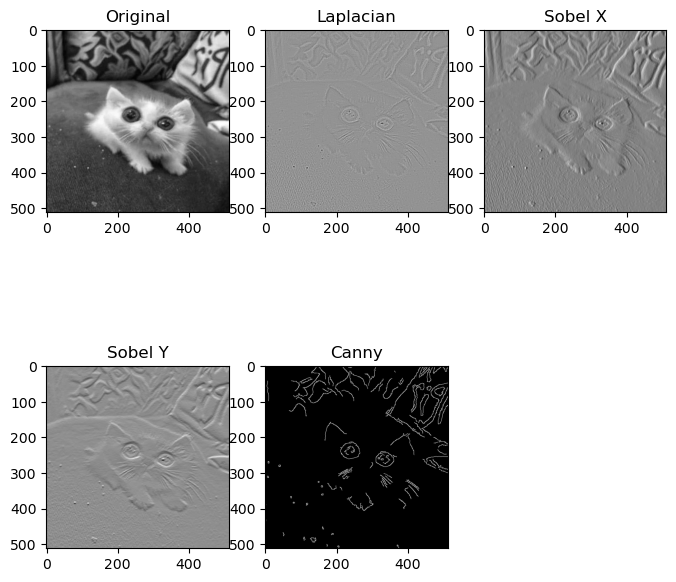

In [22]:
result_image = [gray, laplacian, sobel_x, sobel_y, canny]
result_title = ["Original", "Laplacian", "Sobel X", "Sobel Y", "Canny"]

plt.figure(1, figsize=(8, 8))
# i itu fungsi untuk subplot 
for i, (curr_image, curr_title) in enumerate(zip(result_image, result_title)):
    plt.subplot(2, 3, i + 1)
    # cmap itu color map
    plt.imshow(curr_image, cmap="gray")
    plt.title(curr_title)
    

### Manual Sobel Kernel

In [24]:
import numpy as np
from scipy.signal import convolve2d

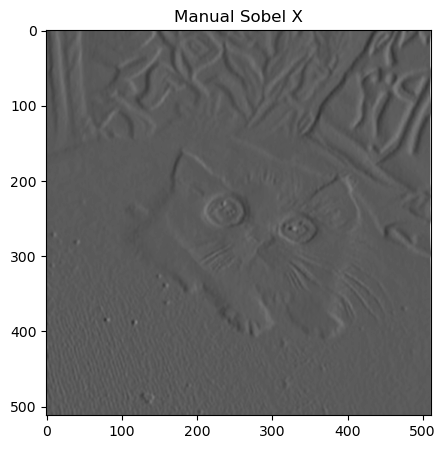

In [31]:
sobel_x_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

gray_blur = cv2.GaussianBlur(gray, (3,3), 5)

manual_sobel_x = convolve2d(gray_blur, sobel_x_kernel, mode="same")

plt.figure(figsize=(5,5))
plt.imshow(manual_sobel_x, cmap="gray")
plt.title("Manual Sobel X")
plt.show()